In [64]:
import pandas as pd
import seaborn as sb
import numpy as np
df = pd.read_csv(r'E:\cms-downloader\cms_downloads\Spring 2023\Big Data and NoSQL\week 2023-5-25\egphotelbookings.csv')
df

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Renaissance Hotel,0,342,2018,July,27,1,0,0,...,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0
1,1,Renaissance Hotel,0,737,2018,July,27,1,0,0,...,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0
2,2,Renaissance Hotel,0,7,2018,July,27,1,0,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0
3,3,Renaissance Hotel,0,13,2018,July,27,1,0,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0
4,4,Renaissance Hotel,0,14,2018,July,27,1,0,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,JW Marriott Hotel,0,23,2017,August,35,30,2,5,...,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0
119386,119386,JW Marriott Hotel,0,102,2017,August,35,31,2,5,...,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2
119387,119387,JW Marriott Hotel,0,34,2017,August,35,31,2,5,...,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4
119388,119388,JW Marriott Hotel,0,109,2017,August,35,31,2,5,...,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0


In [65]:
# check null values at each column
df.isna().sum()

Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Company has 112593 null values so we can't fill it, drop it.
we don't need babies column so drop this column.
Unnamed: 0 is just the id drop it.
arrival_date_week_number: we will not use arrival_date_week_number so drop it.

In [66]:
# drop company,babies and Unnamed column
df.drop(['company', 'babies', 'Unnamed: 0', 'arrival_date_week_number'], axis=1, inplace=True)


drop null values in the country and children. 

In [67]:
df.dropna(subset=['country', 'children'], inplace=True)

In [68]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
meal                                  0
country                               0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16004
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0


In [69]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_week_nights                33
adults                              14
children                             5
meal                                 5
country                            177
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              332
days_in_waiting_list               128
customer_type                        4
adr                               8870
required_car_parking_spaces          5
total_of_special_requests

get insights about the values inside each column

In [70]:
for col in df.columns:
    if(df[col].nunique() < 10):
        print(col)
        print(df[col].value_counts())
        print()

hotel
JW Marriott Hotel    79302
Renaissance Hotel    39596
Name: hotel, dtype: int64

is_canceled
0    74745
1    44153
Name: is_canceled, dtype: int64

arrival_date_year
2019    56435
2017    40604
2018    21859
Name: arrival_date_year, dtype: int64

children
0.0     110319
1.0       4852
2.0       3650
3.0         76
10.0         1
Name: children, dtype: int64

meal
BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

distribution_channel
TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64

is_repeated_guest
0    115092
1      3806
Name: is_repeated_guest, dtype: int64

deposit_type
No Deposit    104163
Non Refund     14573
Refundable       162
Name: deposit_type, dtype: int64

customer_type
Transient          89174
Transient-Party    25078
Contract            4076
Group                570
Name: customer_type, dtype: int64

required_

The frequency of each column looks normal to us.

Detect the outliers and remove them using boxplots. : lead time, agent, days_in_waiting_list, adr


<AxesSubplot: >

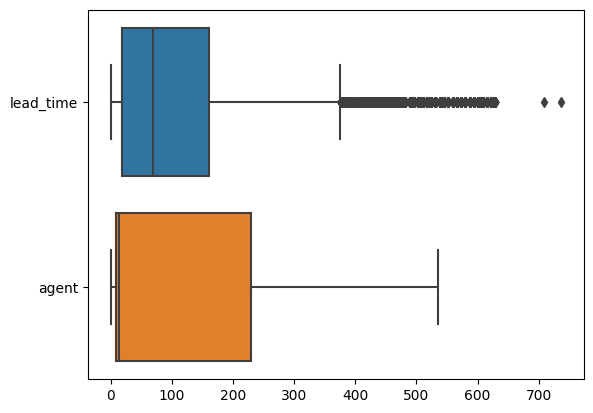

In [71]:
sb.boxplot(data=df[['lead_time','agent']], orient='h')

In [72]:
def remove_outliers(df, col_name):
    # remove outliers in lead_time
    Q1 = np.percentile(df[col_name], 25, method='midpoint')
    Q3 = np.percentile(df[col_name], 75, method='midpoint')
    IQR = Q3 - Q1
    upper=Q3+1.5*IQR

    #Below Lower bound
    lower=Q1-1.5*IQR
    df = df[((df[col_name]>=lower) & (df[col_name] <= upper))]
    return df

def boxplot(df, col_name):
    sb.boxplot( data = df[col_name], orient="h")

In [73]:
df = remove_outliers(df, 'lead_time')

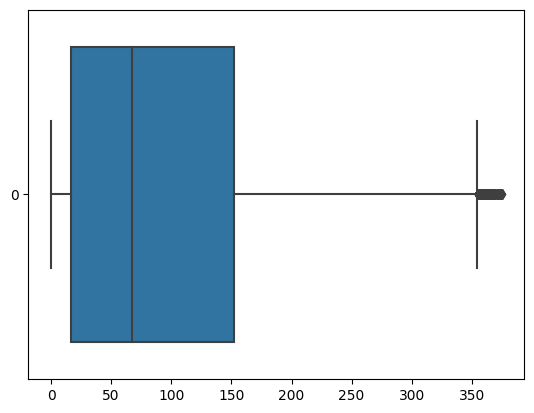

In [74]:
boxplot(df,'lead_time')

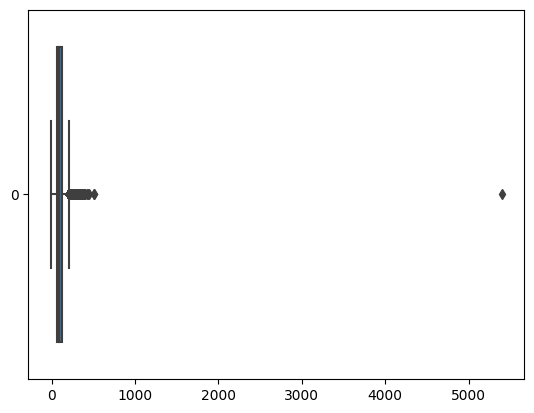

In [75]:
boxplot(df,'adr')

In [76]:
df = remove_outliers(df, 'adr')

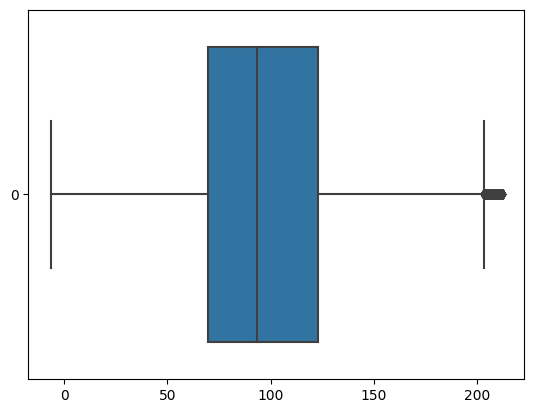

In [77]:
boxplot(df, 'adr')

In [78]:
for col in categorical_columns:
    print(col, df[col].unique(),'\n')

NameError: name 'categorical_columns' is not defined

In [ ]:
# encode the categorical values


C:\Users\saryn\AppData\Local\Temp\ipykernel_9236\912234535.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

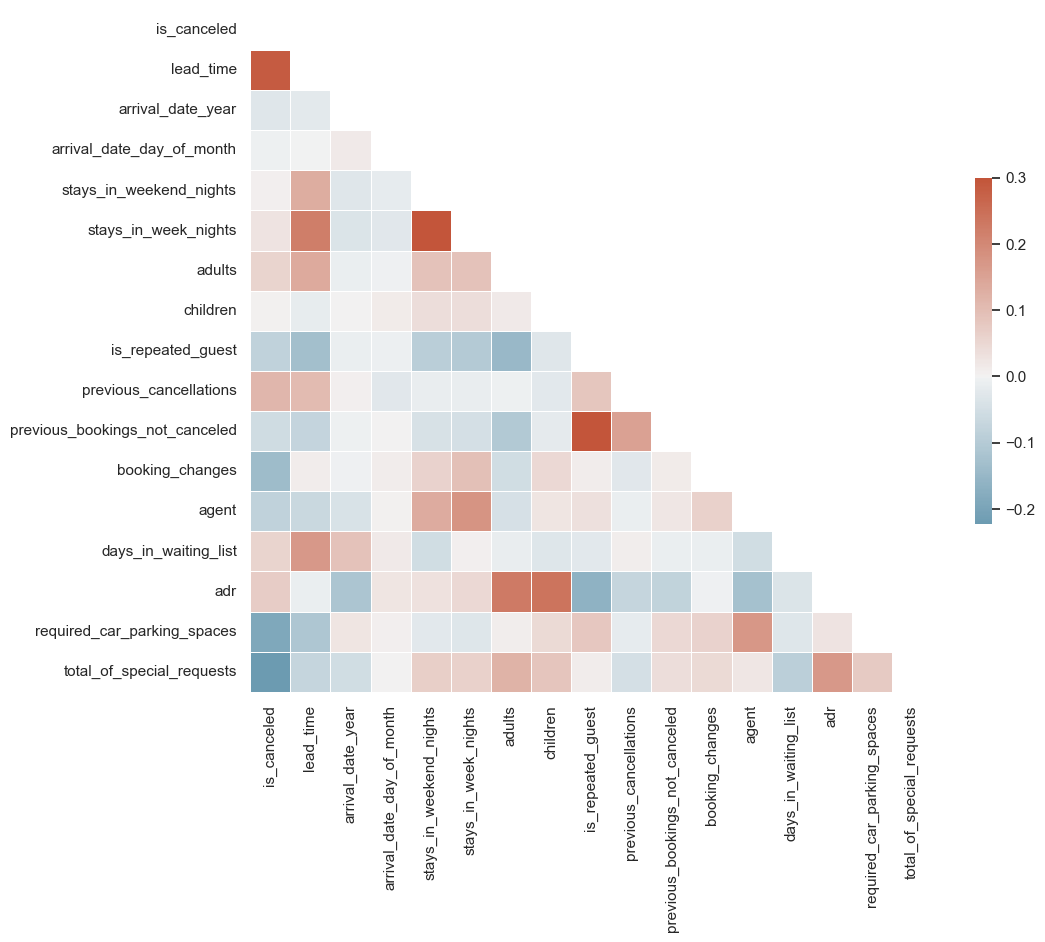

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

People who get children with them are more profitable to the hotel as there is a correlation between children and adr.

Check the relation between the lead_time and is_cancelled.

<AxesSubplot: xlabel='lead_time', ylabel='Count'>

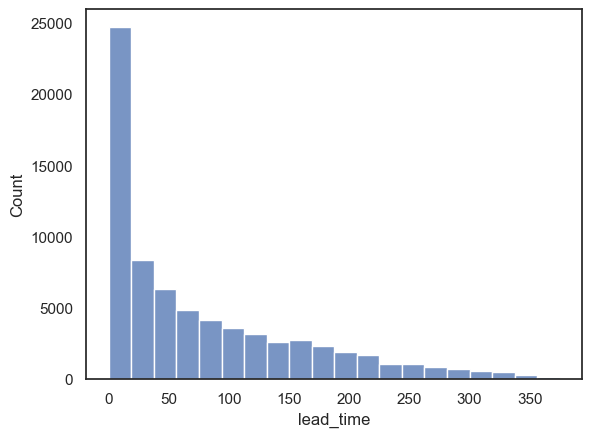

In [ ]:
sns.histplot(data=df[(df['is_canceled'] == 0)], x='lead_time', bins=20)

We see from the histogram of the non-cancelled reservations: lead_time is shifted towards left or small number of days,
so : people don't tend to cancel when they reserved in date closer to the check in.

<AxesSubplot: xlabel='lead_time', ylabel='Count'>

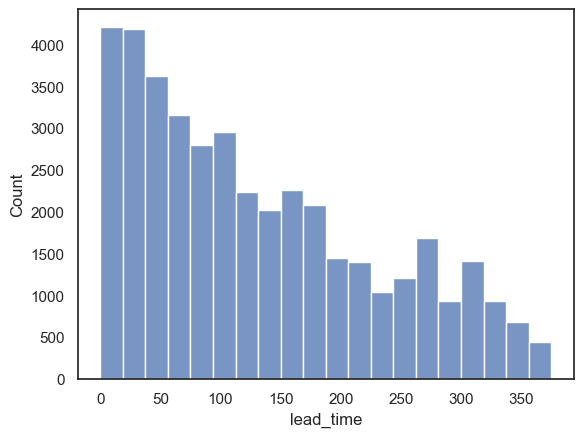

In [ ]:
sns.histplot(data=df[(df['is_canceled'] == 1)], x='lead_time', bins=20)

We don't have a pattern for the cancelled booking except for the user can cancel any time.

We want to see what are the months which are high in booking that are not cancelled (arrival_date_month).

<AxesSubplot: xlabel='Count', ylabel='arrival_date_month'>

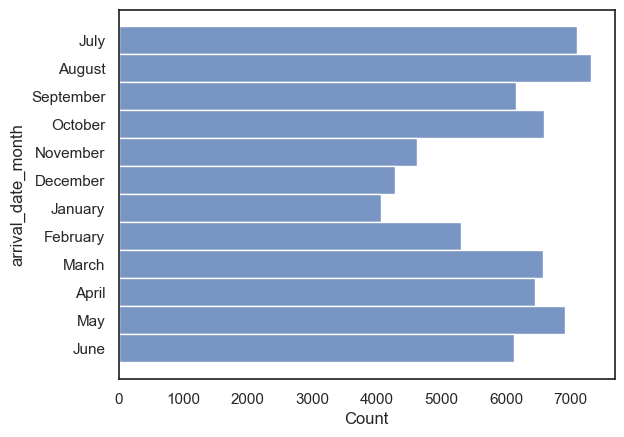

In [ ]:
sb.histplot(data=df[(df['is_canceled']==0)], y='arrival_date_month' )

May, July, August are the highest months that users book in.

<AxesSubplot: xlabel='Count', ylabel='deposit_type'>

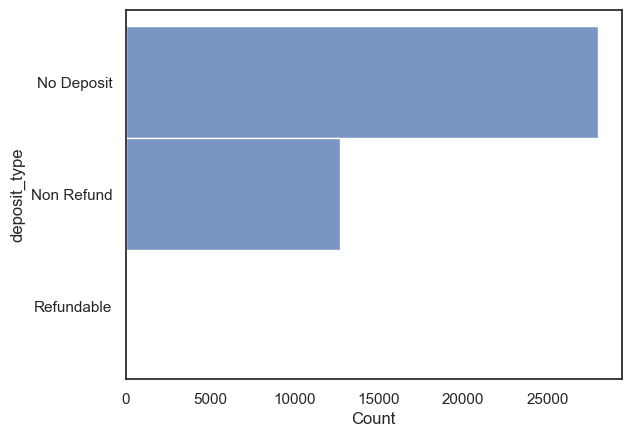

In [ ]:
sb.histplot(data=df[(df['is_canceled']==1)], y='deposit_type')

We need to get the ratio between the number of people who choose No_deposit and cancelled bookings.

We need to get the ratio between the number of people who choose Non Refund and cancelled bookings.

In [ ]:
nodeposit = len(df[(df['deposit_type'] == 'No Deposit')])
nonrefund = len(df[(df['deposit_type'] == 'Non Refund')])
nondepositeAndCancelled = len(df[(df['deposit_type'] == 'No Deposit') & (df['is_canceled']==1)])
nonreufndAndCancelled = len(df[(df['deposit_type'] == 'Non Refund') & (df['is_canceled']==1)])
print('No deposit users', nodeposit)
print('Non Refund users', nonrefund)
print('No deposit users & cancelled', nondepositeAndCancelled)
print('Non Refund users & cancelled', nonreufndAndCancelled)
print('ratio between No deposit users / No deposit users that cancelled = ', nondepositeAndCancelled/nodeposit)
print('ratio between Non Refund users / Non Refund users that cancelled = ', nonreufndAndCancelled/nonrefund)

No deposit users 99249
Non Refund users 12810
No deposit users & cancelled 27988
Non Refund users & cancelled 12718
ratio between No deposit users / No deposit users that cancelled =  0.2819978035043174
ratio between Non Refund users / Non Refund users that cancelled =  0.9928181108508978


There is a strange pattern that users that use deposit type as non refund tends to cancel more than users that don't add deposit.
The histogram and the ratio strengthen the pattern.

See which customers are more loyal to their hotel, and the next time any customer has this rule will be given a promotion.

In [ ]:
loyal_customers = df[(df['previous_bookings_not_canceled'] > 3) & (df['previous_cancellations'] == 0)]
print('number of loyal customers till now', len(loyal_customers))

number of loyal customers till now 637


In [ ]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [ ]:
sc = SparkContext()
spark = SparkSession.builder.appName("Python Spark DataFrames basic example").config("spark.some.config.option", "some-value").getOrCreate()
sdf = spark.createDataFrame(df) 
sdf.createOrReplaceTempView("hotels_booking")
sdf.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- arrival_date_year: long (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_day_of_month: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: long (nullable = true)
 |-- deposit_type: string (nullable = true)
 |-- agent: double (nullable = true)
 |-- days_in_waiting_list: long (nu

In [ ]:
# get the most repeated agencies with non cancelled bookings
command = '''
SELECT agent,COUNT(agent) as numberOfBookings
FROM hotels_booking
WHERE IsNan(agent) = 0
and is_canceled = 0
GROUP BY agent
ORDER BY numberOfBookings DESC
LIMIT 5'''
spark.sql(command).show()

+-----+----------------+
|agent|numberOfBookings|
+-----+----------------+
|  9.0|           18289|
|240.0|            7651|
|  7.0|            3007|
| 14.0|            2825|
|250.0|            2022|
+-----+----------------+



We have 3 agencies(9, 240, 7) that we can offer their users some promotions, as these agencies bring us huge number of visitors.

Let's get the users that have large difference between the not canceled bookings and canceled bookings.
Any further booking that contains these criteria we will give them promotions. as they are serious customers.

In [80]:
command = '''
SELECT *,(previous_bookings_not_canceled-previous_cancellations) as loyality FROM hotels_booking
WHERE (previous_bookings_not_canceled-previous_cancellations) > 1
ORDER BY loyality
'''
spark.sql(command).show()

+-----------------+-----------+---------+-----------------+------------------+-------------------------+-----------------------+--------------------+------+--------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+---------------+-----+---------------------------+-------------------------+--------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in_waiting_list|  customer_type|  adr|required_car_parking_spaces|total_of_special_requests|loyality|
+-----------------+-----------+---------+-----------------+------------------+--------------------